In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from fonte_dados.fabrica import FabricaFonteDados
from treinamento.coerencia import CalculadorCoerencia
from util import constants

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Análise de coerência de quantidade de tópicos

In [1]:
def inicializar_fonte_dados(descricao):
    fabrica = FabricaFonteDados()
    fonte_dados_origem = fabrica.get_fonte_dados(descricao)
    fonte_dados_origem.carregar_dados()
    return fonte_dados_origem

def executar_calculo_coerencia():
    fonte_dados_origem = inicializar_fonte_dados(constants.NERDS_VIAJANTES)

    topicos_from = 5
    topicos_to = 120

    calculador_coerencia = CalculadorCoerencia(fonte_dados_origem)
    coerencias = calculador_coerencia.calcular_coerencias(topicos_from, topicos_to, debug=True)
    coerencias.to_csv(f'/home/helder/estudos/tcc-pucmg-2/src/python/notebooks/treinamento/coerencias_{topicos_from}-to-{topicos_to}.csv')

# executar_calculo_coerencia()

## Análise de resultado de coerência por tópicos

In [4]:
filename = '/home/helder/estudos/tcc-pucmg-2/src/python/notebooks/treinamento/coerencias.csv'
coerencias = pd.read_csv(filename)
coerencias.sort_values(by='num_topics', ascending=True)

,num_topics,coherence,tempo_gasto
0,5,0.287585,11.097838
1,6,0.351020,11.185353
2,7,0.339009,9.542368
3,8,0.332139,9.689327
4,9,0.347688,10.437901
...,...,...,...
111,116,0.371833,61.167592
112,117,0.383607,90.857166
113,118,0.381635,84.491429
114,119,0.375315,77.206749


In [5]:
sns.set_theme()
sns.set_context('paper')

### Coerência por número de tópicos

Text(0, 0.5, 'Coerência')

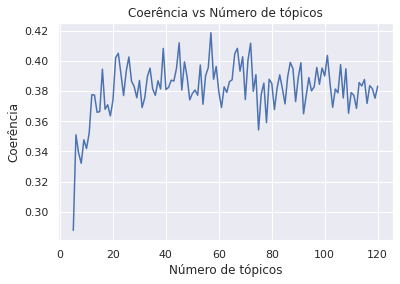

In [17]:
sns.set_theme()
ax = sns.lineplot(data=coerencias, x='num_topics', y='coherence')
ax.set_title('Coerência vs Número de tópicos')
ax.set_xlabel('Número de tópicos')
ax.set_ylabel('Coerência')

In [19]:
ax.figure.savefig('output.png')

### Coerência por número de tópicos e tempo gasto no cálculo da mesma

In [7]:
coerencias['coherence_100'] = coerencias['coherence'].apply(lambda x: x * 100)
coerencias_comp = pd.melt(coerencias, id_vars=['num_topics'], value_vars=['tempo_gasto', 'coherence_100'])

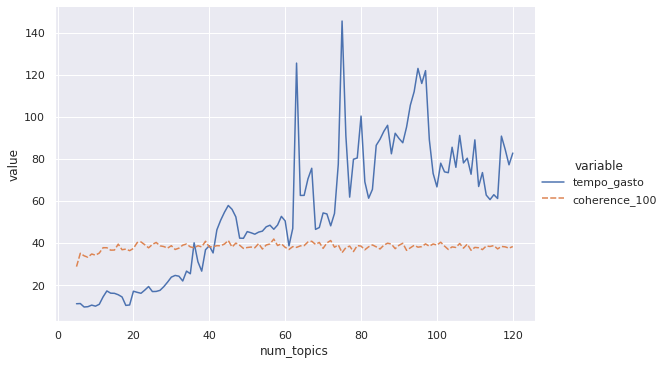

In [13]:
plot = sns.relplot(data=coerencias_comp, x='num_topics', y='value', hue='variable', style='variable', kind='line', aspect=1.5)
plot.savefig('out.png')

### Análise das maiores coerências

A partir do resultado abaixo pude escolher um conjunto de número de tópicos a serem utilizados no treinamento. Um número muito interessante é o 22, que mesmo sendo um número relativamente baixo foi o sexto com maior coerência.
- Os 7 com maiores coerencias foram escolhidos (inclusive eles não são próximos uns dos outros): 57,  45,  72,  67,  39, 22, 101

```Javascript
num_topics = [57, 45, 72, 67, 39, 22, 101]
```

In [20]:
maiores_indices = coerencias['coherence'].values.argsort()[::-1]
maiores_coerencias = coerencias['coherence'].values[maiores_indices]
num_topics = coerencias['num_topics'].values[maiores_indices]
print(maiores_indices[:20])
print(f'Valores de maiores coerencias: {maiores_coerencias[:20]}')
print(f'Topicos com maior coerencia: {num_topics[:20]}')

[ 52  40  67  62  34  17  61  96  64  21  16  66  42  82  86 101  48  54
  92  51]
Valores de maiores coerencias: [0.41872794 0.41205135 0.41181404 0.40841484 0.40832945 0.4050952
 0.4047402  0.40364516 0.40278473 0.40265877 0.40210833 0.40049839
 0.39942504 0.39909078 0.39883144 0.39758255 0.39731179 0.39629952
 0.39570395 0.39549987]
Topicos com maior coerencia: [ 57  45  72  67  39  22  66 101  69  26  21  71  47  87  91 106  53  59
  97  56]


In [21]:
top10_coherences = list(zip(num_topics, maiores_coerencias))

In [48]:
def get_latex_table(coerencias):
    cs = " \\".join([f'{cs[0]} & {cs[1]}' for cs in coerencias[:10]])
    return f'begin{{center}} begin{{tabular}} {{ |c|c| }} hline {cs} end{{tabular}} end{{center}}'

get_latex_table(top10_coherences)

'begin{center} begin{tabular} { |c|c| } hline 57 & 0.4187279439804192 \\45 & 0.4120513470103957 \\72 & 0.4118140382511174 \\67 & 0.4084148429857527 \\39 & 0.4083294457749056 \\22 & 0.4050952035903351 \\66 & 0.4047401968259075 \\101 & 0.4036451569534363 \\69 & 0.4027847252786048 \\26 & 0.4026587678111619 end{tabular} end{center}'

In [22]:
top10_coherences

[(57, 0.4187279439804192),
 (45, 0.4120513470103957),
 (72, 0.4118140382511174),
 (67, 0.4084148429857527),
 (39, 0.4083294457749056),
 (22, 0.4050952035903351),
 (66, 0.4047401968259075),
 (101, 0.4036451569534363),
 (69, 0.4027847252786048),
 (26, 0.4026587678111619),
 (21, 0.4021083264992514),
 (71, 0.4004983902627288),
 (47, 0.3994250417414075),
 (87, 0.3990907823033798),
 (91, 0.3988314419670837),
 (106, 0.3975825539414977),
 (53, 0.3973117909031314),
 (59, 0.3962995236283354),
 (97, 0.3957039501305577),
 (56, 0.3954998710317663),
 (99, 0.3953428903493933),
 (34, 0.395238561137784),
 (44, 0.3951953077419695),
 (108, 0.3948378704007443),
 (88, 0.3948269781246196),
 (16, 0.3945722012745759),
 (25, 0.3932239738025317),
 (68, 0.3932157532874408),
 (23, 0.3914733318697979),
 (74, 0.3909301618721258),
 (83, 0.3907903220563415),
 (55, 0.3903694099968377),
 (100, 0.3900166344304873),
 (33, 0.3896789092355318),
 (86, 0.3895170381291002),
 (48, 0.3894886142178577),
 (90, 0.3890868250435434)